In [1]:

%reload_ext autoreload
%autoreload 2

In [2]:
import colorsys
import math
import os
from collections import namedtuple

import matplotlib.patches as mpatch
import matplotlib.pyplot as plt
import numpy as np
import skimage.color as color

import utils
from colors import ColorsCorpusReader
from colors import ColorsCorpusExample
from torch_color_describer import (ContextualColorDescriber,create_example_dataset)


import color_processing as cp
np.set_printoptions(suppress=True)


## Create Color embedding

In [3]:
color_enbedding_dimension = 128

def return_color(rgb_c) :
    lab = color.rgb2lab(np.asarray(rgb_c ))
    lab[0] = lab[0] /100.0 * 2.0 - 1.0
    lab[1] = lab[1] /127.0
    lab[2] = lab[2] /127.0
    return lab

def represent_color(rgb_c):
    lab = return_color(rgb_c)
    a    = np.pi
    size = color_enbedding_dimension - 1 
    c = [ np.dot( lab , [2.0,np.cos(a*t/size),np.sin(a*t/size)] ) for t  in range(0,size+1,1) ]
    return np.array(c)

## Read corpus

In [4]:
utils.fix_random_seeds()
COLORS_SRC_FILENAME = os.path.join("data", "colors", "filteredCorpus.csv")
dev_corpus   = ColorsCorpusReader(COLORS_SRC_FILENAME,word_count=2, normalize_colors=True)
dev_examples = list(dev_corpus.read())
dev_hls_colors, dev_texts = zip(*[[ex.colors, ex.contents] for ex in dev_examples])
dev_rgb_colors = [ [colorsys.hls_to_rgb(*color) for color in colors] for colors in dev_hls_colors]

## View first example with embedding

Medium pink


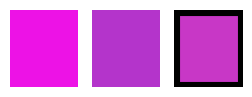

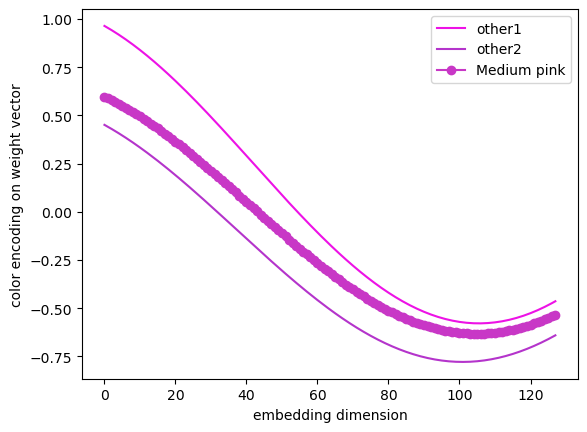

In [5]:
import matplotlib.pyplot as plt
import numpy as np

Patch    = namedtuple("Patch", "text color idx")

ex1 = next(dev_corpus.read())
ex1.display()

some_patches = [ 
    Patch("other1"       ,colorsys.hls_to_rgb(*ex1.colors[0]),0),
    Patch("other2"       ,colorsys.hls_to_rgb(*ex1.colors[1]),1),
    Patch(ex1.contents   ,colorsys.hls_to_rgb(*ex1.colors[2]),2)  #target is in #2 spot
 ]

def visualize(patches) :
    y = [ represent_color(patch.color) for patch in patches ]
    fig, ax = plt.subplots()
    for y0,patch in zip(y,patches) :
        if patch.idx == 2 :
            ax.plot(y0, color=patch.color, label=patch.text, marker='o')
        else :
            ax.plot(y0, color=patch.color, label=patch.text)
    ax.legend()
    ax.set_xlabel("embedding dimension")
    ax.set_ylabel('color encoding on weight vector')
    plt.show()

visualize(some_patches)

